## Reliability testing -  Henrik's Experiment Design

In [37]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

def plot_hist(log,l=1e-7,u=1e-2,b=1000):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            x.append(float(line.split()[0]))
            y.append(float(line.split()[1]))

    #plt.xscale('log')
    plt.xlabel("t")
    plt.hist(x,bins=b, range=(l,u),color='b')
    plt.hist(y,bins=b, range=(l,u),color='g')
    #plt.show()
    
def log_hist(log,l=-7,u=-2,b=100):
    with open(log) as f:
        lines = f.readlines()
        x = []
        y = []
        for line in lines:
            x.append(float(line.split()[0]))
            y.append(float(line.split()[1]))

    bins = np.logspace(l,u,b)
    plt.xscale('log')
    plt.xlabel("t (log)")
    plt.hist(x,bins=bins,color='b')
    plt.hist(y,bins=bins,color='g')
    #plt.show()

In [359]:
#plt.rcParams["figure.figsize"] = (8,3)
#plt.title("Histogram")
#plot_hist("advanced_tests/logs/hen_50.txt",1e-5,1e-3,100)
#plt.show()

## Comparision of Algorithm B and Algorithm G

> The strategies A and B define how the algorithms are compared. The comparions are done based on a summary statistic.

> The summary statistics used in this discussion are minimum and median.

### Strategy A

> 1) Repeat Algorithm B and G, S times. Let $B_S$ and $G_S$ be the set of S measurements of algorithm B and G respectively. Let $statistic(B_S)$ and $statistic(G_S)$ be the summary statistic of corresponding algorithms

\begin{equation} 
  strategy_A(B,G) =
  \begin{cases}
    B \text{ is better than G}      & \quad \text{if } statistic(B_S) > statistic(G_S)\\
    G \text{ is better than B} & \quad \text{ otherwise}
  \end{cases}
\end{equation} 

### Strategy B

> 1) Repeat Algorithm B and G, S times

> 2) Sample M measurements from $B_S$ and $G_S$ and compute the respective summary statistic

> 3) Repeat Step 2, K times. Let $B_k$ and $G_k$ be the set of M measurements in the $k^{th}$ repetition and $k \in \{1,2,...K\}$


> \begin{equation} 
  strategy_B(B,G) =
  \begin{cases}
    B \text{ is better than G}       & \quad \text{if } \quad \frac{\#(statistic(B_k) > statistic(G_k))}{K} > thresh\_high \\
    B \text{ is as good as G}  & \quad \text{if } \quad thresh\_low < \frac{\#(statistic(B_k) > statistic(G_k))}{K} < thresh\_high \\
    G \text{ is better than B}       & \quad \text{if } \quad \frac{\#(statistic(B_k) > statistic(G_k))}{K} < thresh\_low
  \end{cases}
\end{equation} 


### Reliability Analysis

> Let Algorithm B be the algorithm with minimal FLOP count. To do reliability analysis, the following hypothesis is used

>> $H_0$ : Algorithm B with minimal FLOP count is better or as good as Algorithm G 

>> $H_1$ : Algorithm G is better than the Algorithm (B) with minimal FLOP count 

> Hypothesis testing is done separately for each strategy. 

> Let $Strategy\_x(B,G) \in \{H_0, H_1\} \qquad H_1 \implies G \text{ is better than } B \qquad H_0 \implies B \text{ is better than G } \lor  \text{ B is as good as } G \quad x \in \{A,B\} $

> **A comparision strategy is said to be highly reliable if it is consistent with hypothesis selection even with repeated comparisions.**   

> Let **N** be the number of repetitions of a strategy. Then the **reliability score is defined as**

>> $Reliability(Strategy\_x) =  |\frac{\sum_n H_0^{(n)} \quad - \quad \sum_n H_1^{(n)}}{N}| \qquad H_0^{(n)}, H_1^{(n)} \in \{0,1\} \quad n \in \{1,2,..,N\} \\ 
Reliability(Strategy\_x) = | P_x(H_0) - P_x(H_1)| \\
Reliability(Strategy\_x) = | 1 - 2P_x(H_1)| \qquad P_x(H_1) = \frac{\sum_n H_1^{(n)}}{N} \in [0,1] $

> Therefore, it is possible to infer **reliability** of a strategy from **P(H1)**

>> $P_x(H_1) = \frac{\# (Strategy\_x == \text{ G is better than B })}{N}$

> **Reliability is high when P(H1) is either 0 or 1. The dependence of Reliability scores on P(H1) is shown in the graph below** 

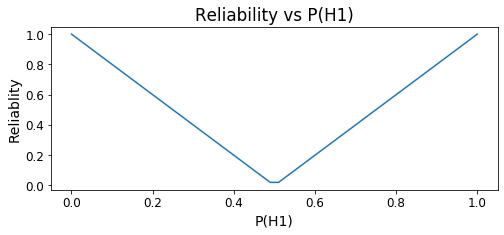

In [407]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Reliability vs P(H1)")
plt.xlabel("P(H1)")
plt.ylabel("Reliablity")
x4 = np.linspace(0,1)
y4 = abs(1-2*x4)
plt.plot(x4,y4)

**Strategy A**

>> $P_A(H_1) = \frac{\#(t_B < t_G)}{N} $

> By Law of Large Numbers,   $N \to \inf \implies \frac{\#(t_B < t_G)}{N} \to E[t_B < t_G]$

> $\implies P_A(H_1) \to  E[t_B < t_G] $

> $E[t_B < t_G] = 0.5 \implies P_A(H_1) \to 0.5 \implies Reliability(A) \to 0$ 

> Therefore, Strategy A is not consistent for any arbitary distrution comparisions 


**Strategy B**

>> $P_B(H_1) = \frac{\#(\frac{\#(t_B < t_G)}{K} > thresh)}{N} $

> By Central Limit Theorem,  $N \to \inf \implies \text{ sample means } \frac{\#(t_B < t_G)}{K} $ follow normal distribution, whose mean approaches the true mean $E[t_B < t_G]$. Therefore, we can replace all sample means $\frac{\#(t_B < t_G)}{K}$ with the true mean $E[t_B < t_G]$

> $\implies P_B(H_1) = P(E[t_B < t_G] > thresh) $

> $ E[t_B < t_G] = k \implies P_A(H_1) \to 1 \implies Reliability(B) \to 1 \qquad \forall k \in [0,1]$

> Strategy B is always consistent for any arbitary distrution comparisions


**Bounds** : (Markov's inequality)

> Confidence $ \implies E[t_B < t_G] \geq P_B(H_1).thresh$

> When the variance is large and we never approach the true expected value, we might end up with $P_B(H_1) = 0.5$. In that case, lower bound on $E[t_B < t_G]$ would give some extra information.

### Extra

> Applying the properties of cumulative distribution

> $\implies P_B(H_1) = P(E[t_B < t_G] > thresh) \leq P(E[t_B < t_G] > thresh-\delta) $

In strategy B, there exist an extra event which compensates for the singinifance test that needs to be done prior to Strategy A



### Proof - Strategy B is more reliable than Strategy A

Consider any two distributions B and G. Let $t_B$ and $t_G$ be certain statistic obtained by sampling distributions B and G respectively. Comparision of statistics of two distribution should fall into one of the following two cases:

> Case 1: $E[t_B < t_G] = 0.5$

> Case 2: $E[t_B < t_G] \neq 0.5$

Note that $t_B < t_G$ is a binary event. Therefore, $E[t_B < t_G] \in [0,1]$

Case 1:

> **Strategy A**

>> $P_A(H_1) = \frac{\#(t_B < t_G)}{N} $

> By Law of Large Numbers,   $N \to \inf \implies \frac{\#(t_B < t_G)}{N} \to E[t_B < t_G]$

>> $P_A(H_1) = E[t_B < t_G] = 0.5 \implies Reliability(Strategy\_A) = 0$

> **Strategy B**

>> $P_B(H_1) = \frac{\#(\frac{\#(t_B < t_G)}{K} > thresh)}{N} $

> By Central Limit Theorem,  $N \to \inf \implies \text{ sample means } \frac{\#(t_B < t_G)}{K} $ follow normal distribution, whose mean approaches the true mean $E[t_B < t_G]$. Therefore, we can replace all sample means $\frac{\#(t_B < t_G)}{K}$ with the true mean $E[t_B < t_G]$

>> $P_B(H_1) = \frac{\#(E[t_B < t_G] > thresh)}{N} =  \frac{\#(0.5 > thresh)}{N} $

>> $thresh > 0.5 \implies P_B(H_1) = 0 \implies Reliability(Strategy\_B) = 1$

Case 2: 

> **Strategy A** : With similar arguments as before, $P_A(H_1) = E[t_B < t_G]$

> **Strategy B** : With similar arguments as before, $P_B(H_1) = E[E[t_B < t_G] > thresh]$

>> When $E[t_B < t_G] \leq thresh \implies P_B(H_1) = 0 \implies \text{Reliability = 1}$

>> When $E[t_B < t_G] > thresh \implies P_B(H_1) = E[t_B < t_G] \implies \text{Reliability is as good as Strategy A}$

**Reliability bound for Strategy B depends on the threshold**

> $Reliability(Strategy\_B) \geq |1 - 2.thresh|$

### Validity of Strategy B

> Note that reliability does not imply validity. For eg, when threshold is low, the alternate hypothesis $(H_1)$ is almost always accepted even for overlapping distributions and yet the reliability values can be high.

> Expected value of the binary event $t_B < t_G$ in the actual distribution indicates the validity of the alternate hypothesis.

>> Validity of $H_1 \propto E[t_B < t_G]$

>> Accepting alternate hypothesis, $H_1 = 1 \implies E[t_B < t_G] > thresh \implies thresh \propto$ Validity of $H_1$

> When $thresh$ is high and $H_1$ is accepted, then $E[t_B < t_G]$ is atleast as high as $thresh$. 

**Example**:

When $thresh = 0.8$, 

> **Confidence of validity** $(E[t_B < t_G]) > 0.8$

> **Reliability** $\geq |1 - 2.thresh| = 0.6$

### CASE 1

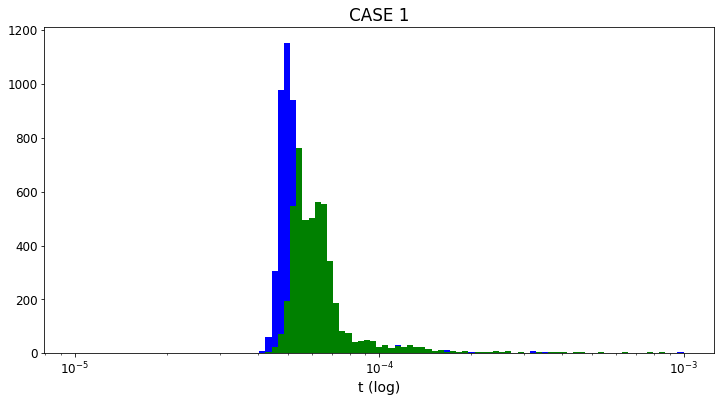

In [427]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title("CASE 1")
log_hist("advanced_tests/logs/hen_50.txt",-5,-3,100)
plt.show()

### CASE 2

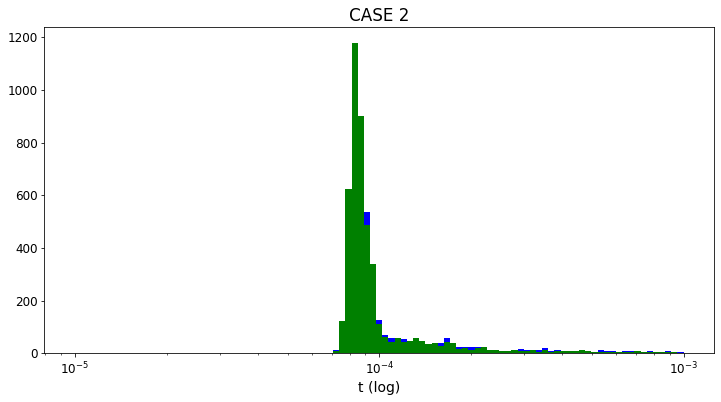

In [428]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title("CASE 2")
log_hist("advanced_tests/logs/hen_same.txt",-5,-3,100)
plt.show()

In [83]:
log = "advanced_tests/logs/hen_50.txt"
with open(log) as f:
        lines = f.readlines()
        sm = []
        lg = []
        for line in lines:
            sm.append(float(line.split()[0]))
            lg.append(float(line.split()[1]))

In [100]:
from random import sample

In [188]:
def median(l):
    l.sort()
    index = int(len(l)/2)
    return l[index]

def prob_error_min(sample_size,s,l):
    p = 0
    N = 3000
    for i in range(N):
        if not min(sample(s,sample_size)) < min(sample(l,sample_size)):
            p+=1
    return p/float(N)

def prob_error_median(sample_size,s,l):
    p = 0
    N = 3000
    for i in range(N):
        if not median(sample(s,sample_size)) < median(sample(l,sample_size)):
            p+=1
    return p/float(N)

In [199]:
x = []
for i in range(1,100):
    x.append(prob_error_min(i,sm,lg))

In [190]:
y = []
for i in range(1,100):
    y.append(prob_error_median(i,sm,lg))

### Reliability 
> A measure is said to have a high reliability if it produces similar results under consistent conditions


### Reliability scores :

> P(B<G) = $\frac{\#(min(B) < min(G))}{N}$ 

### CASE A

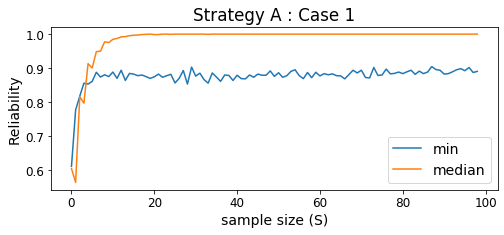

In [419]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Strategy A : Case 1")
plt.xlabel("sample size (S)")
plt.ylabel("Reliability")
plt.plot(1-2*np.array(x),label='min')
plt.plot(1-2*np.array(y),label='median')
plt.legend()

In [195]:
x1 = []
for i in range(1,100):
    x1.append(prob_error_min(i,lg,lg))

In [197]:
y1 = []
for i in range(1,100):
    y1.append(prob_error_median(i,lg,lg))

### CASE B

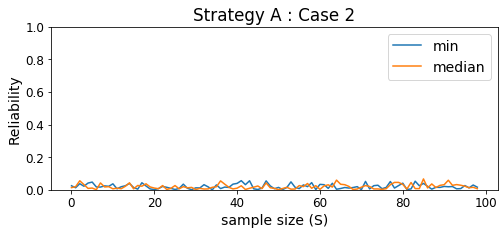

In [423]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Strategy A : Case 2")
plt.xlabel("sample size (S)")
plt.ylabel("Reliability")
plt.plot(abs(1-2*np.array(x1)),label='min')
plt.plot(abs(1-2*np.array(y1)),label='median')
plt.ylim(0,1)
plt.legend()

In [330]:
def prob_error_min_multi(sample_size,thresh_h, thresh_l,s,l):
    p_h = 0
    p_l = 0
    p_m = 0
    N = 3000
    M = 5
    for i in range(N):
        pj=0
        experiment_s = sample(s,sample_size)
        experiment_l = sample(l,sample_size)
        for j in range(M):
            if min(sample(experiment_s,5)) < min(sample(experiment_l,5)):
                pj+=1
        if pj/float(M) > thresh_h:
            p_h+=1
        elif pj/float(M) < thresh_l:
            p_l+=1
        else:
            p_m+=1
        
    return [p_l/float(N),p_m/float(N),p_h/float(N)]

def prob_error_median_multi(sample_size,thresh_h, thresh_l,s,l):
    p_h = 0
    p_l = 0
    p_m = 0
    N = 3000
    M = 5
    for i in range(N):
        pj=0
        experiment_s = sample(s,sample_size)
        experiment_l = sample(l,sample_size)
        for j in range(M):
            if median(sample(experiment_s,5)) < median(sample(experiment_l,5)):
                pj+=1
        if pj/float(M) > thresh_h:
            p_h+=1
        elif pj/float(M) < thresh_l:
            p_l+=1
        else:
            p_m+=1
        
    return [p_l/float(N),p_m/float(N),p_h/float(N)]

In [329]:
prob_error_median_multi(10,0.8,0.2,lg,sm)

[0.8376666666666667, 0.16166666666666665, 0.0006666666666666666]

In [332]:
x2 = []
for i in range(5,100):
    x2.append(prob_error_min_multi(i,0.8,0.2,lg,lg))

In [337]:
y2 = []
for i in range(5,100):
    y2.append(prob_error_median_multi(i,0.8,0.2,lg,lg))

### CASE B

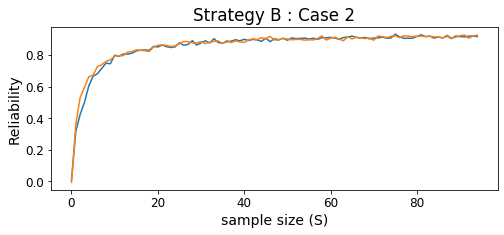

In [422]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Strategy B : Case 2")
plt.xlabel("sample size (S)")
plt.ylabel("Reliability")
plt.plot(1-2*np.array(x2)[:,0])
plt.plot(1-2*np.array(y2)[:,0])


Henrik's design :

> P(B<G) = $\frac{\#(min(B) < min(G))}{N}$ 

> P(B >=G) = 1 - P(B<G) 

Modified design : 

> P(B < G) = $\frac{\#(\frac{\#(min(B) < min(G))}{M} > thresh\_high)}{N}$

> P(B ~ G) = $\frac{thresh\_low  < \#(\frac{\#(min(B) < min(G))}{M} < thresh\_high)}{N}$

> P(B > G) = $\frac{\#(\frac{\#(min(B) < min(G))}{M} > thresh\_low)}{N}$

### <-----|(l)-------------(h)|----->

```python
for i in range(N):
    pj=0
    experiment_s = sample(s,sample_size)
    experiment_l = sample(l,sample_size)
    for j in range(M):
        if median(sample(experiment_s,5)) < median(sample(experiment_l,5)):
            pj+=1
    if pj/float(M) > thresh_high:
        p_h+=1
    elif pj/float(M) < thresh_low:
        p_l+=1
    else:
        p_m+=1
        
return [p_l/float(N),p_m/float(N),p_h/float(N)]
```

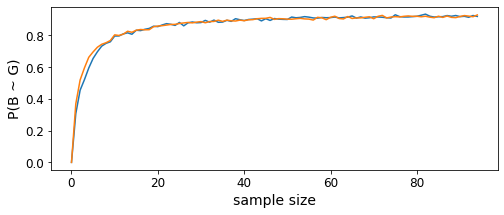

In [377]:
plt.rcParams["figure.figsize"] = (8,3)
plt.xlabel("sample size")
plt.ylabel("P(B ~ G)")
plt.plot(np.array(x2)[:,1])
plt.plot(np.array(y2)[:,1])

In [342]:
x3 = []
for i in range(5,100):
    x3.append(prob_error_min_multi(i,0.8,0.2,sm,lg))

In [344]:
y3 = []
for i in range(5,100):
    y3.append(prob_error_median_multi(i,0.8,0.2,sm,lg))

### CASE A

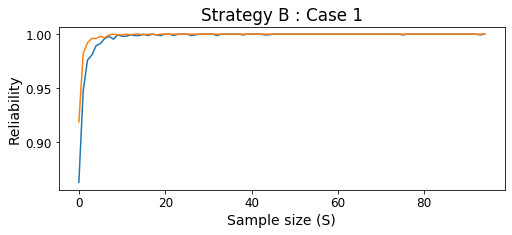

In [420]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Strategy B : Case 1")
plt.xlabel("Sample size (S)")
plt.ylabel("Reliability")
plt.plot(1-2*np.array(x3)[:,0])
plt.plot(1-2*np.array(y3)[:,0])

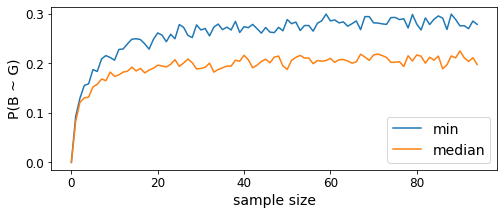

In [375]:
plt.rcParams["figure.figsize"] = (8,3)
plt.xlabel("sample size")
plt.ylabel("P(B ~ G)")
plt.plot(np.array(x3)[:,1],label='min')
plt.plot(np.array(y3)[:,1],label='median')
plt.legend()

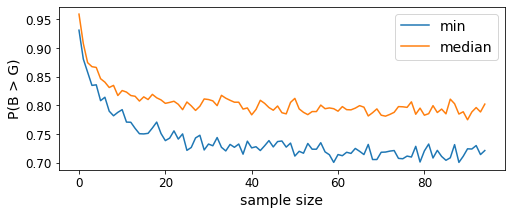

In [381]:
plt.rcParams["figure.figsize"] = (8,3)
plt.xlabel("sample size")
plt.ylabel("P(B > G)")
plt.plot(np.array(x3)[:,2],label='min')
plt.plot(np.array(y3)[:,2],label='median')
plt.legend()

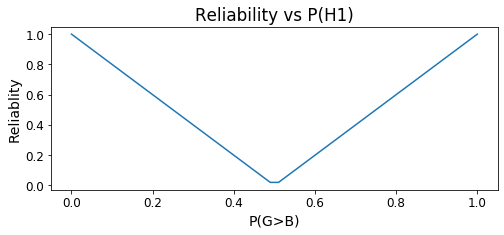

In [392]:
plt.rcParams["figure.figsize"] = (8,3)
plt.title("Reliability vs P(H1)")
plt.xlabel("P(G>B)")
plt.ylabel("Reliablity")
x4 = np.linspace(0,1)
y4 = abs(1-2*x4)
plt.plot(x4,y4)

In [386]:
y4

array([1.        , 0.95918367, 0.91836735, 0.87755102, 0.83673469,
       0.79591837, 0.75510204, 0.71428571, 0.67346939, 0.63265306,
       0.59183673, 0.55102041, 0.51020408, 0.46938776, 0.42857143,
       0.3877551 , 0.34693878, 0.30612245, 0.26530612, 0.2244898 ,
       0.18367347, 0.14285714, 0.10204082, 0.06122449, 0.02040816,
       0.02040816, 0.06122449, 0.10204082, 0.14285714, 0.18367347,
       0.2244898 , 0.26530612, 0.30612245, 0.34693878, 0.3877551 ,
       0.42857143, 0.46938776, 0.51020408, 0.55102041, 0.59183673,
       0.63265306, 0.67346939, 0.71428571, 0.75510204, 0.79591837,
       0.83673469, 0.87755102, 0.91836735, 0.95918367, 1.        ])

### Henrik's feed back

> 1) Justification for parameter selection (validation exp ..)

> 2) Transitivity of comparisions (is it needed?)

> 3) Is kruskal wallis anova a simpler alternative?